# Data Science and Visualization (RUC F2023)

## Lecture 8: Clustering II

 # Evaluation of Clustering Results
 
We give examples on the following evaluation scores:
 
 * Adjusted Rand Index (ARI)
 * Normalized Mutual Information (NMI)
 * Silhouette Score
 
The first two are used when you have groundtruth. The last for cases where you don't have groundtruth.

In [1]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
import mglearn

## 1. Data and Preparation

In [2]:
# X is an array of the 2D points.
# Array y stores the groudtruth cluster ids for each data point.
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

We create a random cluster assignment for reference:

In [3]:
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

### A facilitator function for comparison:

In [4]:
def compare_clustering_algs(score_func, ref):
    """
    For all included clustering algorithms, get the socre by using 
    the score function *score_func* against the reference *ref*
    """
    
    # Make a list of algorithms to use
    algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

    # Set four sub figures for four approaches
    fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

    # First, we plot the random cluster assignment
    axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
    # The score function compares the groundtruth cluter ids in y and the clustering result
    axes[0].set_title("Random assignment: score={:.2f}".format(score_func(ref, random_clusters)))

    # Next, we plot the three clustering algorithms' result
    for ax, algorithm in zip(axes[1:], algorithms):
        # Plot the current algorithm's cluster assignment and cluster centers
        clusters = algorithm.fit_predict(X_scaled)
        ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
        ax.set_title("{}: score={:.2f}".format(algorithm.__class__.__name__, score_func(ref, clusters)))

## 2. Adjusted Rand Index Score (ARI)

The higher the score is, the better the clustering.

Text(0.5, 1.05, 'Adjusted Rand Index (ARI)')

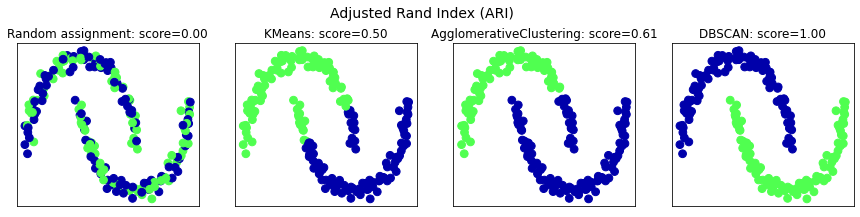

In [5]:
from sklearn.metrics.cluster import adjusted_rand_score

# We use y (groundtruth) as the reference for scoring
compare_clustering_algs(adjusted_rand_score, y)

# Get the current figure. If no current figure exists, a new one is created using figure().
fig = plt.gcf()
fig.suptitle("Adjusted Rand Index (ARI)", x=0.5, y=1.05, fontsize=14)

## 3. Normalized Mutual Information Score (NMI)

The higher the score is, the better the clustering.

Text(0.5, 1.05, 'Normalized Mutual Information (NMI)')

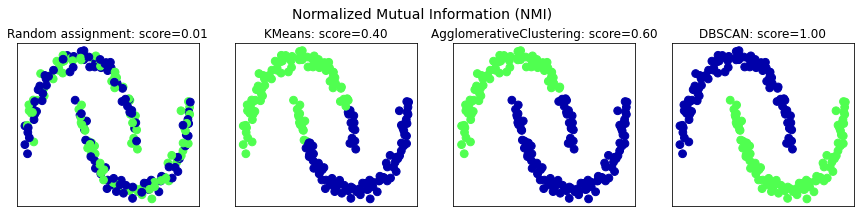

In [6]:
from sklearn.metrics.cluster import normalized_mutual_info_score

# We use y (groundtruth) as the reference for scoring
compare_clustering_algs(normalized_mutual_info_score, y)

fig = plt.gcf()
fig.suptitle("Normalized Mutual Information (NMI)", x=0.5, y=1.05, fontsize=14)

## 4. Silhouette Score

### 4.1 The two-moons dataset

Text(0.5, 1.05, 'Silhouette Score')

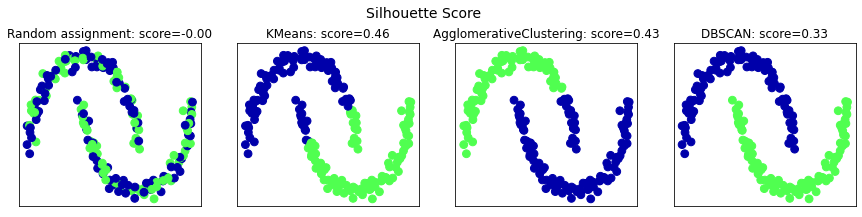

In [7]:
from sklearn.metrics.cluster import silhouette_score

# We use X as the reference for scoring, as this score function does not require groundtruth
compare_clustering_algs(silhouette_score, X)

fig = plt.gcf()
fig.suptitle("Silhouette Score", x=0.5, y=1.05, fontsize=14)

### Observations and analysis

Above, the best clustering (DBSCAN) didn't get the best score. This is because DBSCAN is not purely based on distance, whereas silhouette score is.

Consider the definitions of distance a (intra-cluster) and b (inter-cluster) in silhouette score. Normally, distance a should be smaller than distance b for a point. However, in the example above, the a distance for a point may be larger than its b distane due to the special shape.

### 4.2 Shopping Dataset

From the shopping data, we only choose the last two attributes, i.e., Annual Income and Spending Score.

In [39]:
import pandas as pd

customers = pd.read_csv('C:/Data/shopping_data.csv')
data = customers.iloc[:, 3:5].values

customers.shape
customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [40]:
def aggClustering(n):
    # Apply the agglomerative clustering algorithm, using n clusters
    agg = AgglomerativeClustering(n_clusters=n)
    assignment = agg.fit_predict(data)

    plt.figure(figsize=(8, 6))
    # Plot the clusters
    mglearn.discrete_scatter(data[:, 0], data[:, 1], assignment)

    cluster_list = []
    for i in range(1, n+1):
        cluster_list.append('Cluster {0}'.format(i))
    plt.legend(cluster_list, loc="best")

    plt.xlabel("Annual Income")
    plt.ylabel("Spending Score")
    plt.title('silhouette_score: {:.4f}'.format(silhouette_score(data, assignment)))
    plt.show()

We apply the Agglomerative Clustering nine times, with 10 to 2 clusters respectively. For each clustering result, we measure the silhouette score.

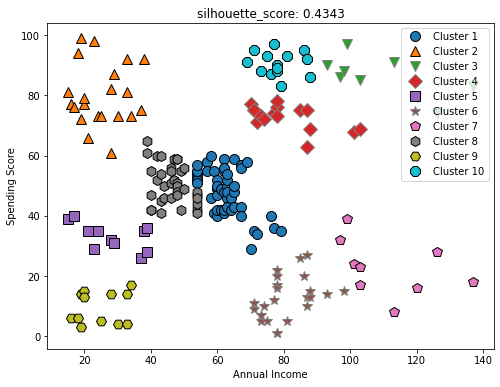

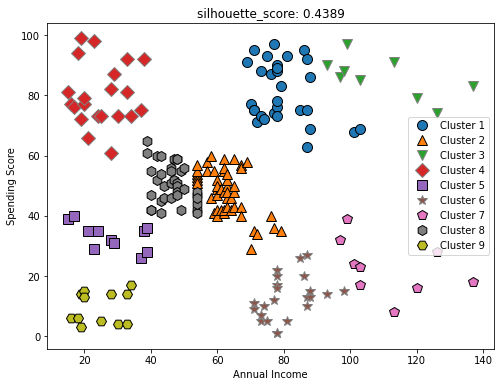

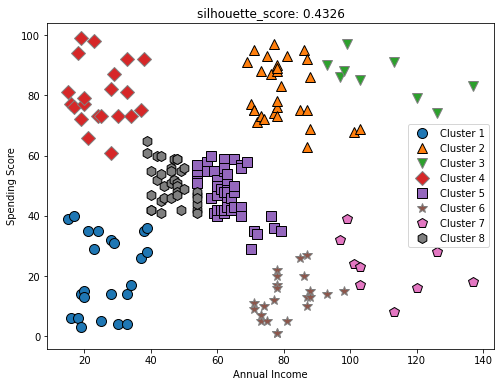

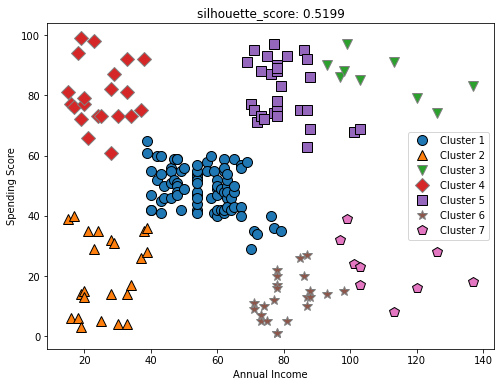

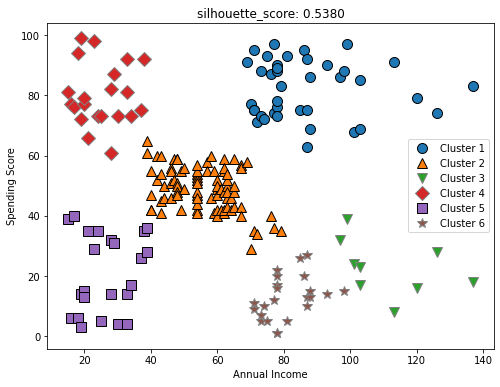

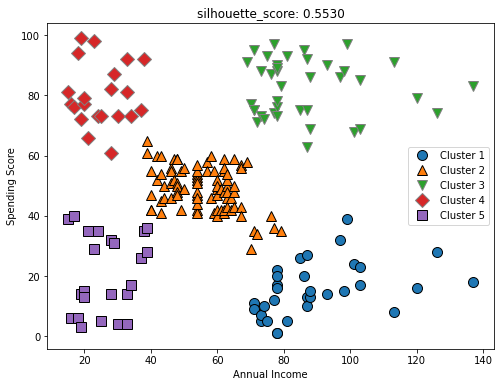

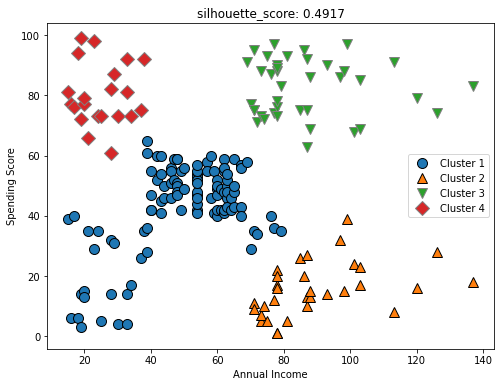

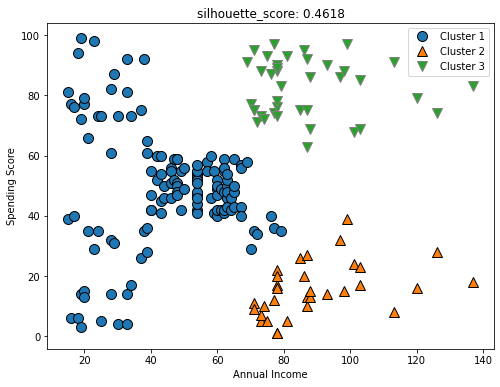

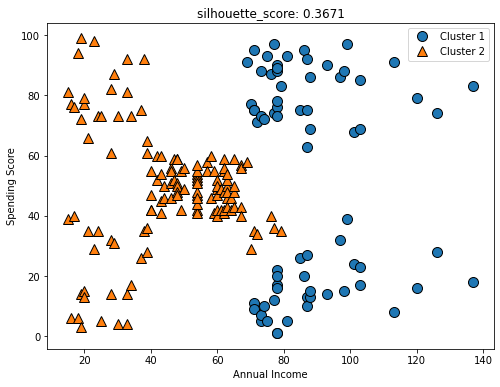

In [41]:
for cn in range(10, 1, -1):
    aggClustering(cn)

Above, the highest score goes to the clustering with 5 clusters, which looks to be the best.

## 5. Why Not Accuracy?

This example shows we cannot use the **Accuracy** score for clustering.

In [13]:
from sklearn.metrics import accuracy_score

# These two labelings of points correspond to the same clustering
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]

# Accuracy is zero, as none of the labels are the same
# We should not use accuracy_score for clustering
print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))

# Adjusted rand score is 1, as the clustering is exactly the same:
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

Accuracy: 0.00
ARI: 1.00
